### Descripción del problema:
##### Un	día,	un	granjero	fue	al	mercado	y	compró	un	lobo,	una	cabra	y	una	col. Para	volver	a su	casa	tenía	que	cruzar	un	río.	El	granjero	dispone	de	una	barca	para	cruzar	a	la	otra orilla,	pero	en	la	barca	solo	caben	él	y	una de	sus	compras.


In [19]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

#### Definición de estado inicial y estado final 

In [5]:
# Estado inicial: todos están en la Orilla inicial
estado_inicial = (0, 0, 0, 0)

In [6]:
# Estado objetivo: todos están en la Orilla final
estado_objetivo = (1, 1, 1, 1)

#### Definición de restricciones para la resolución del acertijo

In [7]:
# Validar si el estado es seguro
def es_valido(estado):
    granjero, lobo, cabra, col = estado
    # El lobo no puede quedarse solo con la cabra
    if granjero != cabra and lobo == cabra:
        return False
    # La cabra no puede quedarse sola con la col
    if granjero != cabra and cabra == col:
        return False
    return True

#### Definición de movimientos posibles

In [8]:
# Generar los estados sucesores posibles
def obtener_sucesores(estado):
    granjero, lobo, cabra, col = estado
    sucesores = []

    # El granjero cruza solo
    nuevo_estado = (1 - granjero, lobo, cabra, col)
    if es_valido(nuevo_estado):
        sucesores.append(nuevo_estado)

    # El granjero lleva al lobo
    if granjero == lobo:
        nuevo_estado = (1 - granjero, 1 - lobo, cabra, col)
        if es_valido(nuevo_estado):
            sucesores.append(nuevo_estado)

    # El granjero lleva a la cabra
    if granjero == cabra:
        nuevo_estado = (1 - granjero, lobo, 1 - cabra, col)
        if es_valido(nuevo_estado):
            sucesores.append(nuevo_estado)

    # El granjero lleva la col
    if granjero == col:
        nuevo_estado = (1 - granjero, lobo, cabra, 1 - col)
        if es_valido(nuevo_estado):
            sucesores.append(nuevo_estado)

    return sucesores

#### Ejecución d ealgoritmo BFS y almacenamiento de escenarios evaluados

In [9]:
# Búsqueda en anchura (BFS) para encontrar la solución más corta
def bfs():
    cola = deque([(estado_inicial, [])])
    visitados = set()
    paso = 0  # Contador de pasos

    while cola:
        # Imprimir el contenido de la cola en cada paso
        print(f"Paso {paso}: Contenido de la cola: {list(cola)}")
        
        estado_actual, camino = cola.popleft()

        # Imprimir el estado actual que se está procesando
        print(f"Procesando estado actual: Granjero: {estado_actual[0]}, Lobo: {estado_actual[1]}, Cabra: {estado_actual[2]}, Col: {estado_actual[3]}")

        # Verificar si se ha alcanzado el estado objetivo
        if estado_actual == estado_objetivo:
            print(f"¡Se ha encontrado la solución en el paso {paso}!")
            return camino + [estado_actual]

        # Saltar los estados ya visitados
        if estado_actual in visitados:
            print(f"Estado ya visitado: {estado_actual}")
            continue

        # Marcar el estado actual como visitado
        visitados.add(estado_actual)

        # Obtener los sucesores
        sucesores = obtener_sucesores(estado_actual)
        print(f"Sucesores generados: {sucesores}")

        # Añadir los sucesores a la cola
        for sucesor in sucesores:
            cola.append((sucesor, camino + [estado_actual]))

        # Incrementar el paso para el siguiente ciclo
        paso += 1


#### Visualización de escenarios evaluados

In [10]:
# Ejecutar BFS para encontrar la solución
solucion = bfs()

Paso 0: Contenido de la cola: [((0, 0, 0, 0), [])]
Procesando estado actual: Granjero: 0, Lobo: 0, Cabra: 0, Col: 0
Sucesores generados: [(1, 0, 1, 0)]
Paso 1: Contenido de la cola: [((1, 0, 1, 0), [(0, 0, 0, 0)])]
Procesando estado actual: Granjero: 1, Lobo: 0, Cabra: 1, Col: 0
Sucesores generados: [(0, 0, 1, 0), (0, 0, 0, 0)]
Paso 2: Contenido de la cola: [((0, 0, 1, 0), [(0, 0, 0, 0), (1, 0, 1, 0)]), ((0, 0, 0, 0), [(0, 0, 0, 0), (1, 0, 1, 0)])]
Procesando estado actual: Granjero: 0, Lobo: 0, Cabra: 1, Col: 0
Sucesores generados: [(1, 0, 1, 0), (1, 1, 1, 0), (1, 0, 1, 1)]
Paso 3: Contenido de la cola: [((0, 0, 0, 0), [(0, 0, 0, 0), (1, 0, 1, 0)]), ((1, 0, 1, 0), [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0)]), ((1, 1, 1, 0), [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0)]), ((1, 0, 1, 1), [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0)])]
Procesando estado actual: Granjero: 0, Lobo: 0, Cabra: 0, Col: 0
Estado ya visitado: (0, 0, 0, 0)
Paso 3: Contenido de la cola: [((1, 0, 1, 0), [(0, 0, 0, 0), (1

#### Sección para imprimir etiquetas con la resolución del algoritmo

In [11]:
# Función para describir la posición de cada elemento
def describir_posicion(valor):
    return "Orilla inicial" if valor == 0 else "Orilla final"

In [12]:
# Función para describir quién cruza en cada paso
def describir_movimiento(estado_anterior, estado_actual):
    granjero_anterior, lobo_anterior, cabra_anterior, col_anterior = estado_anterior
    granjero_actual, lobo_actual, cabra_actual, col_actual = estado_actual

    if granjero_anterior != granjero_actual:
        if lobo_anterior != lobo_actual:
            return "El granjero cruza con el lobo"
        elif cabra_anterior != cabra_actual:
            return "El granjero cruza con la cabra"
        elif col_anterior != col_actual:
            return "El granjero cruza con la col"
        else:
            return "El granjero cruza solo"
    return ""

In [13]:
# Función para imprimir el resultado paso a paso de manera clara
def imprimir_solucion(solucion):
    for i, estado in enumerate(solucion):
        granjero, lobo, cabra, col = estado
        
        if i == 0:
            print(f"Paso {i}: Inicio -> Todos están en la orilla inicial.")
        else:
            estado_anterior = solucion[i-1]
            movimiento = describir_movimiento(estado_anterior, estado)
            print(f"Paso {i}: {movimiento}")
        
        print(f"  Granjero: {describir_posicion(granjero)}")
        print(f"  Lobo: {describir_posicion(lobo)}")
        print(f"  Cabra: {describir_posicion(cabra)}")
        print(f"  Col: {describir_posicion(col)}")
        print("")


In [14]:
# Ejecutar la función
imprimir_solucion(solucion)

Paso 0: Inicio -> Todos están en la orilla inicial.
  Granjero: Orilla inicial
  Lobo: Orilla inicial
  Cabra: Orilla inicial
  Col: Orilla inicial

Paso 1: El granjero cruza con la cabra
  Granjero: Orilla final
  Lobo: Orilla inicial
  Cabra: Orilla final
  Col: Orilla inicial

Paso 2: El granjero cruza solo
  Granjero: Orilla inicial
  Lobo: Orilla inicial
  Cabra: Orilla final
  Col: Orilla inicial

Paso 3: El granjero cruza con el lobo
  Granjero: Orilla final
  Lobo: Orilla final
  Cabra: Orilla final
  Col: Orilla inicial

Paso 4: El granjero cruza con la cabra
  Granjero: Orilla inicial
  Lobo: Orilla final
  Cabra: Orilla inicial
  Col: Orilla inicial

Paso 5: El granjero cruza con la col
  Granjero: Orilla final
  Lobo: Orilla final
  Cabra: Orilla inicial
  Col: Orilla final

Paso 6: El granjero cruza solo
  Granjero: Orilla inicial
  Lobo: Orilla final
  Cabra: Orilla inicial
  Col: Orilla final

Paso 7: El granjero cruza con la cabra
  Granjero: Orilla final
  Lobo: Orilla

#### Generación de grafo

In [15]:
# Crear un grafo dirigido
G = nx.DiGraph()

In [16]:
# Añadir nodos (estados) y sus transiciones de acuerdo con los resultados proporcionados
nodos_corr = [
    "OI: Granjero, Lobo, Cabra, Col | OF: ",
    "OI: Lobo, Col | OF: Granjero, Cabra",
    "OI: Granjero, Lobo, Col | OF: Cabra",
    "OI: Col | OF: Granjero, Lobo, Cabra",
    "OI: Granjero, Cabra, Col | OF: Lobo",
    "OI: Cabra | OF: Granjero, Lobo, Col",
    "OI: Granjero, Cabra | OF: Lobo, Col",
    "OI: | OF: Granjero, Lobo, Cabra, Col"
]

G.add_nodes_from(nodos_corr)

In [17]:
# Añadir las aristas (movimientos) entre nodos corregidos
aristas_corr = [
    ("OI: Granjero, Lobo, Cabra, Col | OF: ", "OI: Lobo, Col | OF: Granjero, Cabra"),
    ("OI: Lobo, Col | OF: Granjero, Cabra", "OI: Granjero, Lobo, Col | OF: Cabra"),
    ("OI: Granjero, Lobo, Col | OF: Cabra", "OI: Col | OF: Granjero, Lobo, Cabra"),
    ("OI: Col | OF: Granjero, Lobo, Cabra", "OI: Granjero, Cabra, Col | OF: Lobo"),
    ("OI: Granjero, Cabra, Col | OF: Lobo", "OI: Cabra | OF: Granjero, Lobo, Col"),
    ("OI: Cabra | OF: Granjero, Lobo, Col", "OI: Granjero, Cabra | OF: Lobo, Col"),
    ("OI: Granjero, Cabra | OF: Lobo, Col", "OI: | OF: Granjero, Lobo, Cabra, Col")
]

G.add_edges_from(aristas_corr)

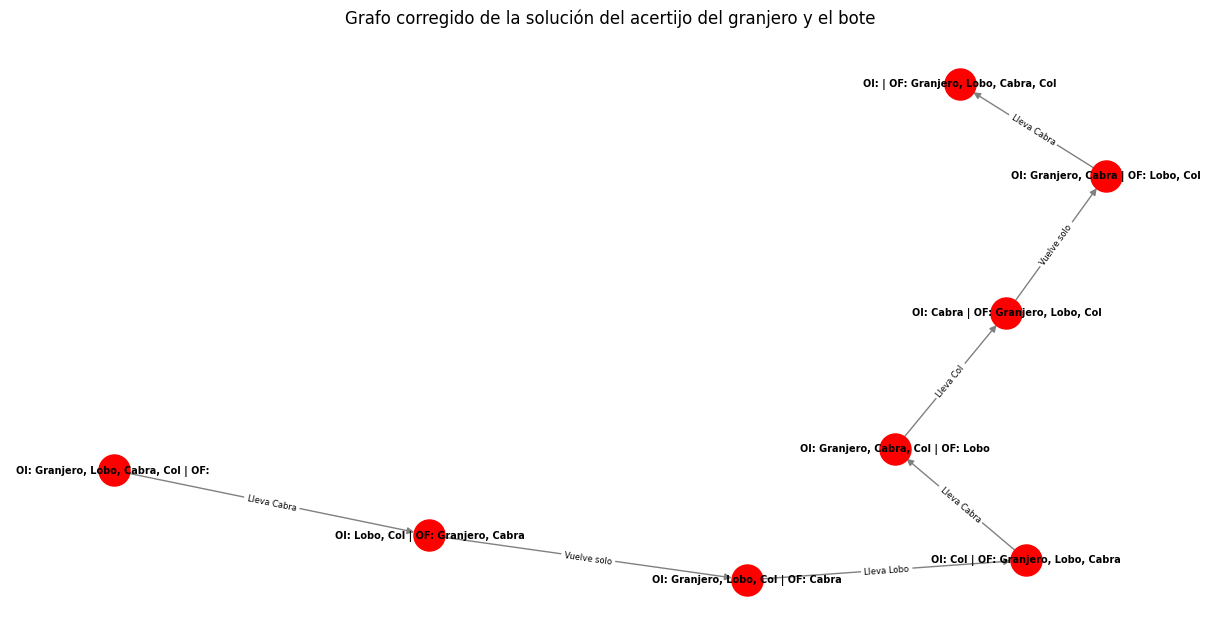

In [18]:
# Dibujar el grafo con las acciones corregidas
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G)

# Dibujar nodos y aristas
nx.draw(G, pos, with_labels=True, node_color="red", node_size=500, font_size=7, font_weight="bold", arrows=True, edge_color='gray')

# Añadir etiquetas a las aristas que describen las acciones
acciones_corr = {
    ("OI: Granjero, Lobo, Cabra, Col | OF: ", "OI: Lobo, Col | OF: Granjero, Cabra"): "Lleva Cabra",
    ("OI: Lobo, Col | OF: Granjero, Cabra", "OI: Granjero, Lobo, Col | OF: Cabra"): "Vuelve solo",
    ("OI: Granjero, Lobo, Col | OF: Cabra", "OI: Col | OF: Granjero, Lobo, Cabra"): "Lleva Lobo",
    ("OI: Col | OF: Granjero, Lobo, Cabra", "OI: Granjero, Cabra, Col | OF: Lobo"): "Lleva Cabra",
    ("OI: Granjero, Cabra, Col | OF: Lobo", "OI: Cabra | OF: Granjero, Lobo, Col"): "Lleva Col",
    ("OI: Cabra | OF: Granjero, Lobo, Col", "OI: Granjero, Cabra | OF: Lobo, Col"): "Vuelve solo",
    ("OI: Granjero, Cabra | OF: Lobo, Col", "OI: | OF: Granjero, Lobo, Cabra, Col"): "Lleva Cabra"
}

# Añadir etiquetas a las aristas
nx.draw_networkx_edge_labels(G, pos, edge_labels=acciones_corr, font_size=6, label_pos=0.5)

plt.title("Grafo corregido de la solución del acertijo del granjero y el bote")
plt.show()